In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [3]:
path_name="C:\\Users\\Home\\CIP_Lab Related Works\\DataSet1\\Amazon_Product.csv"
df=pd.read_csv(path_name,encoding= 'unicode_escape')


In [4]:
df.tail(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


Data Exploration

In [5]:
df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [6]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [8]:
df.shape

(413840, 6)

In [9]:
#df['reviews.rating']=df['reviews.rating'].fillna(0)

In [10]:
df.dropna(subset=["Rating"] , inplace = True)

In [11]:
df.shape

(413840, 6)

In [12]:
df["Rating"] = df["Rating"].astype(int)

Data Visualization

Training Model

In [13]:
df=df[0:45000]

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(df, df["Rating"]): 
    strat_train = df.reindex(train_index)
    strat_test = df.reindex(test_index)

In [15]:
len(strat_train)

36000

In [16]:
strat_train["Rating"].value_counts()/len(strat_train)

5    0.548667
1    0.209556
4    0.122694
3    0.063361
2    0.055722
Name: Rating, dtype: float64

In [17]:
len(strat_test)

9000

In [18]:
strat_test["Rating"].value_counts()/len(strat_test)

5    0.548667
1    0.209556
4    0.122667
3    0.063444
2    0.055667
Name: Rating, dtype: float64

In [19]:
df["Rating"].mean()

3.7452

In [20]:
strat_train.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [21]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Rating"] = strat_train["Rating"].apply(sentiments)
strat_test["Rating"] = strat_test["Rating"].apply(sentiments)
strat_train["Rating"][:20]

4509     Positive
28941    Positive
8090     Negative
28316    Positive
2459     Positive
32739    Positive
18631    Positive
44873    Positive
15763    Positive
9010     Positive
34721    Positive
3017     Negative
369      Negative
25415    Negative
22914    Positive
22717    Positive
44910    Positive
2136     Positive
4351     Positive
22233    Positive
Name: Rating, dtype: object

Training Testing Split Data

In [22]:
X_train = strat_train["Reviews"]
X_train_targetSentiment = strat_train["Rating"]
X_test = strat_test["Reviews"]
X_test_targetSentiment = strat_test["Rating"]
print(len(X_train), len(X_test))
print(len(X_train_targetSentiment), len(X_test_targetSentiment))

36000 9000
36000 9000


In [23]:
strat_train["Rating"]

4509     Positive
28941    Positive
8090     Negative
28316    Positive
2459     Positive
           ...   
3309     Positive
39398    Negative
26217    Positive
22416    Negative
6808     Positive
Name: Rating, Length: 36000, dtype: object

In [24]:
X_train = X_train.fillna("")
X_test = X_test.fillna("")
X_train_targetSentiment = X_train_targetSentiment.fillna("")
X_test_targetSentiment = X_test_targetSentiment.fillna("")

In [25]:
X_train.head(2)


4509                                           Love itð
28941    The Good:This was brand new in a sealed box fr...
Name: Reviews, dtype: object

In [26]:
X_test.head(2)

33889    Wouldn't hold a charge and wouldn't connect to...
18458    My son is happy. I'm happy. Great replacement ...
Name: Reviews, dtype: object

In [27]:
X_train_targetSentiment.head(2)

4509     Positive
28941    Positive
Name: Rating, dtype: object

In [28]:
X_test_targetSentiment.head(2)

33889    Negative
18458    Positive
Name: Rating, dtype: object

In [29]:
print(len(X_train), len(X_test))
print(len(X_train_targetSentiment), len(X_test_targetSentiment))

36000 9000
36000 9000


Natural Language Processing

In [30]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nltk.download('stopwords')

In [31]:

stop_words = stopwords.words("english")
stop_words.remove("not")
stop_words[::10]

['i',
 "you've",
 'himself',
 'they',
 'that',
 'been',
 'a',
 'while',
 'through',
 'in',
 'here',
 'few',
 'same',
 'don',
 've',
 "doesn't",
 'mightn',
 'wasn']

In [32]:

def cleanText(raw_text, remove_stopwords=True, stemming=False, split_text=False, \
             ):

    text = BeautifulSoup(raw_text, 'lxml').get_text()  
    letters_only = re.sub("[^a-zA-Z]", " ", text)  
    words = letters_only.lower().split()  
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        stemmer = PorterStemmer()
        #stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [33]:
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 good price good product


In [34]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords =  [RegExpTokenizer(str(m)) for m in X_train_cleaned]
print(ListWords[1])

['good', 'brand', 'new', 'sealed', 'box', 'vendor', 'bought', 'yes', 'unlocked', 'gsm', 'phone', 'actually', 'mobile', 'sim', 'popped', 'replaced', 'sim', 'card', 'iphone', 'problems', 'bad', 'gb', 'straight', 'enough', 'memory', 'iphone', 'days', 'photos', 'take', 'lot', 'space', 'text', 'messages', 'emails', 'really', 'able', 'use', 'ipod', 'time', 'ios', 'installed', 'gb', 'things', 'start', 'getting', 'cramped', 'seriously', 'iphone', 'go', 'settings', 'general', 'usage', 'manage', 'storage', 'see', 'large', 'apps', 'pandora', 'alone', 'like', 'kb', 'deleting', 'bunch', 'unused', 'stuff', 'kb', 'left', 'really', 'even', 'enough', 'update', 'ios', 'release', 'new', 'one', 'hook', 'thing', 'laptop', 'day', 'comes', 'yes', 'writing', 'review', 'obviously', 'works', 'short', 'live', 'limitations', 'buy', 'right', 'case', 'one', 'ever', 'even', 'know', 'cheapest', 'phone', 'apple', 'makes', 'guarantee', 'short', 'order', 'say', 'got', 'bg', 'one']


In [35]:
np.array(X_train)[1]

'The Good:This was brand new in a sealed box from the vendor I bought it from.Yes this is an unlocked GSM phone.It actually had a T-mobile SIM in it which I popped out and replaced with my AT&T SIM card from my iPhone 5. No problems there.The bad:8GB is straight up not enough memory for an iPhone these days. Photos take up a lot of space as do text messages and emails (you won\'t really be able to use it as an iPod). By the time the iOS is installed you\'re down to 5-6GB then things start getting cramped. Seriously, if you have an iPhone go to Settings-General-Usage-Manage Storage and see how large these apps are. Pandora alone is like 150kb. So after deleting a bunch of unused stuff I have 800kb left. That\'s really not even enough to update the iOS when they release a new one, so I will have to hook this thing to my laptop when that day comes (yes I\'m writing this review in it, so it obviously works).In short: but it if you can live with the limitations. If you buy the right case no

In [36]:
ListWords[1]

['good',
 'brand',
 'new',
 'sealed',
 'box',
 'vendor',
 'bought',
 'yes',
 'unlocked',
 'gsm',
 'phone',
 'actually',
 'mobile',
 'sim',
 'popped',
 'replaced',
 'sim',
 'card',
 'iphone',
 'problems',
 'bad',
 'gb',
 'straight',
 'enough',
 'memory',
 'iphone',
 'days',
 'photos',
 'take',
 'lot',
 'space',
 'text',
 'messages',
 'emails',
 'really',
 'able',
 'use',
 'ipod',
 'time',
 'ios',
 'installed',
 'gb',
 'things',
 'start',
 'getting',
 'cramped',
 'seriously',
 'iphone',
 'go',
 'settings',
 'general',
 'usage',
 'manage',
 'storage',
 'see',
 'large',
 'apps',
 'pandora',
 'alone',
 'like',
 'kb',
 'deleting',
 'bunch',
 'unused',
 'stuff',
 'kb',
 'left',
 'really',
 'even',
 'enough',
 'update',
 'ios',
 'release',
 'new',
 'one',
 'hook',
 'thing',
 'laptop',
 'day',
 'comes',
 'yes',
 'writing',
 'review',
 'obviously',
 'works',
 'short',
 'live',
 'limitations',
 'buy',
 'right',
 'case',
 'one',
 'ever',
 'even',
 'know',
 'cheapest',
 'phone',
 'apple',
 'makes',

In [37]:
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names()))
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


Number of features : 12232 

Show some feature names : 
 ['aa', 'beaten', 'code', 'diego', 'fallas', 'hater', 'kolbi', 'naked', 'popes', 'responde', 'songs', 'toaaronnation', 'wirelss']


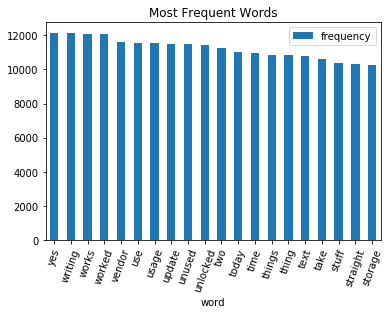

In [38]:
most_freq_words = pd.DataFrame(countVect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=False, by = "frequency")[:20]
most_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Most Frequent Words")

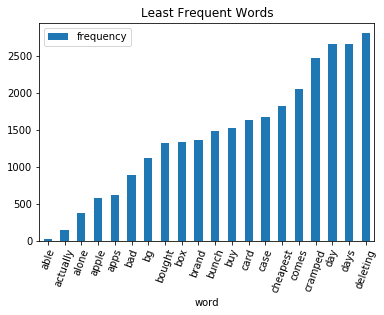

In [39]:
least_freq_words = pd.DataFrame(countVect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=True, by = "frequency")[:20]
least_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Least Frequent Words")

In [40]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_countVect, X_train_targetSentiment)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score , classification_report
predictions = mnb.predict(countVect.transform(X_test_cleaned))
accuracy_score(X_test_targetSentiment, predictions)


0.8934444444444445

In [42]:
print(classification_report(X_test_targetSentiment, predictions))

              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86      2387
     Neutral       0.65      0.31      0.42       571
    Positive       0.91      0.96      0.94      6042

    accuracy                           0.89      9000
   macro avg       0.81      0.71      0.74      9000
weighted avg       0.88      0.89      0.88      9000



In [43]:
print("\nConfusion Matrix : \n", metrics.confusion_matrix(X_test_targetSentiment, predictions))


Confusion Matrix : 
 [[2040   51  296]
 [ 137  179  255]
 [ 174   46 5822]]


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) 
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 4718 

Show some feature names : 
 ['ability', 'damaged', 'icons', 'pixel', 'strength']


In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train_cleaned[0:30000], X_train_targetSentiment[0:30000])

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_nominalNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [46]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.8704444444444445

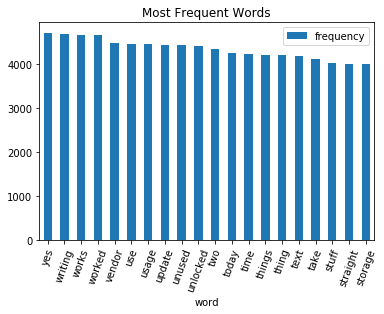

In [47]:
most_freq_words = pd.DataFrame(tfidf.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=False, by = "frequency")[:20]
most_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Most Frequent Words")

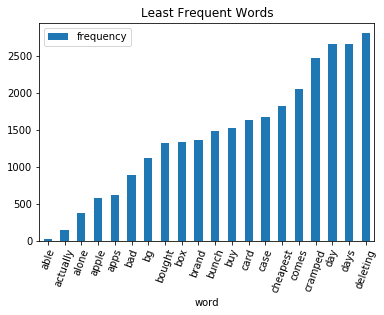

In [48]:
least_freq_words = pd.DataFrame(countVect.vocabulary_.items(), columns=['word', 'frequency'])[:100].sort_values(ascending=True, by = "frequency")[:20]
least_freq_words.plot.bar(x="word", y="frequency", rot=70, title="Least Frequent Words")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train_cleaned, X_train_targetSentiment)



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf_logReg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [50]:
import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.912

In [51]:
test=["Bad"]
clf_logReg_pipe.predict(test)

array(['Negative'], dtype=object)

In [52]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

df_cv = count_vect.fit_transform(X_train)        

df_tf = tfidf_transformer.fit_transform(df_cv)

In [53]:
X_train_targetSentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re

max_fatures = 30000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X_train.values)
X1 = tokenizer.texts_to_sequences(X_train.values)
X1 = pad_sequences(X1[:30000])

Y1 = pd.get_dummies(X_train_targetSentiment[:30000]).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

embed_dim = 150
lstm_out = 32#200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(LSTM(lstm_out))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

(22500, 1363) (22500, 3)
(7500, 1363) (7500, 3)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1363, 150)         4500000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                23424     
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 4,523,523
Trainable params: 4,523,523
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
batch_size = 10
history = model.fit(X1_train, Y1_train, epochs = 3, batch_size=batch_size, validation_split=0.3 , verbose = 2)

Train on 15749 samples, validate on 6751 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
15749/15749 - 966s - loss: 0.3827 - acc: 0.8628 - val_loss: 0.3180 - val_acc: 0.8902
Epoch 2/3
15749/15749 - 1014s - loss: 0.2115 - acc: 0.9304 - val_loss: 0.2815 - val_acc: 0.9120
Epoch 3/3
15749/15749 - 1181s - loss: 0.1472 - acc: 0.9533 - val_loss: 0.3551 - val_acc: 0.8950


In [57]:
twt = ["The tablet is not good, does not work very well."]
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=1363, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

[[ 0  0  0 ... 43 22 83]]
1/1 - 1s
[0.47517422 0.31389478 0.21093102]


In [58]:
twt = ["The tablet is good, really liked it."]
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=1363, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

[[  0   0   0 ...  90 717   3]]
1/1 - 0s
[7.6908997e-04 7.8204740e-03 9.9141043e-01]


In [59]:
twt = ["The tablet is ok, but it works fine"]
twt = tokenizer.texts_to_sequences(twt)
twt = pad_sequences(twt, maxlen=1363, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

[[  0   0   0 ...   3  30 127]]
1/1 - 0s
[0.01345935 0.1959277  0.790613  ]


In [60]:
Y1 = pd.get_dummies(X_train_targetSentiment).values
print(Y1)
print(X_train_targetSentiment)

[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [1 0 0]
 [0 0 1]]
4509     Positive
28941    Positive
8090     Negative
28316    Positive
2459     Positive
           ...   
3309     Positive
39398    Negative
26217    Positive
22416    Negative
6808     Positive
Name: Rating, Length: 36000, dtype: object


In [63]:
instance="The tablet is not good, does not work very well."
instance = tokenizer.texts_to_sequences(instance)
print(instance)
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]
instance = pad_sequences(flat_list, padding='post', maxlen=1363)
model.predict(instance)

[[95], [1908], [929], [], [95], [6], [1789], [3156], [929], [95], [], [2], [777], [], [853], [1183], [95], [], [896], [1183], [1183], [1082], [], [], [1082], [1183], [929], [777], [], [853], [1183], [95], [], [1394], [1183], [1960], [1515], [], [3018], [929], [1960], [825], [], [1394], [929], [3156], [3156], []]


array([[0.09877115, 0.0698147 , 0.83141416]], dtype=float32)

In [64]:
model.save("AmazonReview.h5")

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re
max_fatures = 50000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X_train.values)
X1 = tokenizer.texts_to_sequences(X_train.values)
X1 = pad_sequences(X1[:50000])

Y1 = pd.get_dummies(X_train_targetSentiment[:50000]).values
X_train_val, X_test, y_train_val, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=42)

In [66]:
strat_train["Rating"]

4509     Positive
28941    Positive
8090     Negative
28316    Positive
2459     Positive
           ...   
3309     Positive
39398    Negative
26217    Positive
22416    Negative
6808     Positive
Name: Rating, Length: 36000, dtype: object

In [67]:
data_minority =strat_train[strat_train["Rating"] == 'Negative']
data_majority =strat_train[strat_train["Rating"] == 'Positive']
print(data_minority.shape)

(9550, 6)


In [68]:
print(data_minority.shape[0])
print(data_majority.shape[0])
bias = data_minority.shape[0]/data_majority.shape[0]
print("Bias value",bias)

9550
24169
Bias value 0.3951342628987546


In [69]:
from sklearn.utils import shuffle
data_majority = df[df['Rating'] <=3]
data_minority = df[df['Rating'] >=4]

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.6,random_state=200),
         data_minority.sample(frac=0.6,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.6,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.6,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [70]:
print('positive data in training:',(train['Rating'] >=4).sum())
print('negative data in training:',(train['Rating'] <=3).sum())
print('positive data in test:',(test['Rating'] >=4).sum())
print('negative data in test:',(test['Rating'] <=3).sum())

positive data in training: 18127
negative data in training: 8873
positive data in test: 12084
negative data in test: 5916


In [71]:
print(df['Rating'].unique())
data_majority = train[train['Rating'] >=4]
data_minority = train[train['Rating'] <=3]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)
from sklearn.utils import resample
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples= data_majority.shape[0],    
                                 random_state=42)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
print("After upsampling\n",data_upsampled['Rating'].value_counts(),sep = "")

[5 4 1 2 3]
majority class before upsample: (18127, 6)
minority class before upsample: (8873, 6)
After upsampling
5    14833
1    11508
3     3459
4     3294
2     3160
Name: Rating, dtype: int64


In [72]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['Reviews'].astype(str).values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['Reviews'].astype(str).values)
X_train = pad_sequences(X_train,maxlen=29)
Y_train = pd.get_dummies(data_upsampled['Rating']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['Reviews'].astype(str).values)
X_test = pad_sequences(X_test,maxlen=29)
Y_test = pd.get_dummies(test['Rating']).values
print("x_test shape", X_test.shape)

x_train shape: (36254, 29)
x_test shape (18000, 29)


In [73]:
from tensorflow.keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Activation, Flatten
from keras.layers import Input
from keras.layers import Conv1D,Convolution1D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import SpatialDropout1D
embed_dim = 128
lstm_out = 192
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
#model.add(tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(32)),
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 29, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 192)               246528    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 965       
Total params: 503,493
Trainable params: 503,493
Non-trainable params: 0
_________________________________________________________________
None


In [75]:
batch_size = 128
# also adding weights
class_weights = {0:1/bias ,
                1: 1.6/bias,
                2:1/bias,
                3:1/bias,
                4:1}
history=model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)

Epoch 1/10
36254/36254 [==============================] - 39s 1ms/step - loss: 0.6280 - accuracy: 0.6218
Epoch 2/10
36254/36254 [==============================] - 36s 994us/step - loss: 0.4720 - accuracy: 0.7207
Epoch 3/10
36254/36254 [==============================] - 35s 967us/step - loss: 0.4193 - accuracy: 0.7545
Epoch 4/10
36254/36254 [==============================] - 37s 1ms/step - loss: 0.3827 - accuracy: 0.7769
Epoch 5/10
36254/36254 [==============================] - 37s 1ms/step - loss: 0.3532 - accuracy: 0.7937
Epoch 6/10
36254/36254 [==============================] - 37s 1ms/step - loss: 0.3339 - accuracy: 0.8099
Epoch 7/10
36254/36254 [==============================] - 34s 943us/step - loss: 0.3145 - accuracy: 0.8197
Epoch 8/10
36254/36254 [==============================] - 34s 946us/step - loss: 0.3004 - accuracy: 0.8290
Epoch 9/10
36254/36254 [==============================] - 34s 941us/step - loss: 0.2882 - accuracy: 0.8347
Epoch 10/10
36254/36254 [====================

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = model.predict_classes(X_test,batch_size = batch_size)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[3238  202  108   17  223]
 [ 227  624   54   10   67]
 [ 158   93  573   39  283]
 [  86   95  176  492 1378]
 [  95   39   55   70 9598]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3788
           1       0.59      0.64      0.61       982
           2       0.59      0.50      0.54      1146
           3       0.78      0.22      0.34      2227
           4       0.83      0.97      0.90      9857

    accuracy                           0.81     18000
   macro avg       0.73      0.64      0.65     18000
weighted avg       0.80      0.81      0.78     18000



In [77]:
model.save('Cip_Amazon.h5')

In [ ]:
twt = ['Good product']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

In [ ]:
i = np.argmax(sentiment)
print(np.argmax(sentiment))
if i<=1:
    print("negative")
if i==2:
    print("Neural")
if(i>=3):
    print("Positive")

In [ ]:
twt = ['Product is good but package damaged']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

In [ ]:
i = np.argmax(sentiment)
print(np.argmax(sentiment))
if i<=1:
    print("negative")
if i==2:
    print("Neural")
if(i>=3):
    print("Positive")

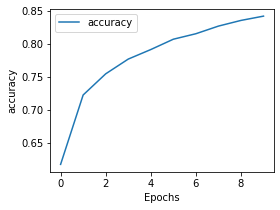

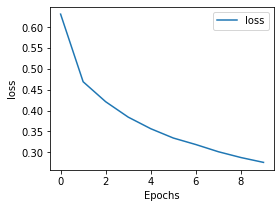

In [135]:
def plot_graph(history,string):
    plt.figure(figsize=(4,3)) 
    plt.plot(history.history[string],label=str(string))
    
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history,'accuracy')
plot_graph(history,'loss')

In [78]:
from tensorflow.keras.layers import Flatten
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Activation, Flatten
from keras.layers import Input
from keras.layers import Conv1D,Convolution1D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import SpatialDropout1D
embed_dim = 128
lstm_out = 192
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
#model.add(tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(32)),
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 29, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 192)               246528    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 965       
Total params: 503,493
Trainable params: 503,493
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
import tensorflow as tf
model_lstm = tf.keras.Sequential([tf.keras.layers.Embedding(max_fatures,embed_dim,input_length = X_train.shape[1]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),    
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(5, activation = 'sigmoid')
])

model_lstm.compile('adam', 'categorical_crossentropy', metrics = ['accuracy'])
model_lstm.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 306,181
Trainable params: 306,181
Non-trainable params: 0
_________________________________________________________________


In [80]:
#Bi-Directional LSTM
history_lstm = model_lstm.fit(X_train, Y_train, batch_size = 32, epochs =10, verbose = 2,class_weight=class_weights)

Epoch 1/10
36254/36254 - 30s - loss: 0.5105 - acc: 0.6984
Epoch 2/10
36254/36254 - 26s - loss: 0.3552 - acc: 0.7940
Epoch 3/10
36254/36254 - 27s - loss: 0.2705 - acc: 0.8486
Epoch 4/10
36254/36254 - 27s - loss: 0.2135 - acc: 0.8819
Epoch 5/10
36254/36254 - 29s - loss: 0.1726 - acc: 0.9066
Epoch 6/10
36254/36254 - 27s - loss: 0.1444 - acc: 0.9222
Epoch 7/10
36254/36254 - 28s - loss: 0.1227 - acc: 0.9331
Epoch 8/10
36254/36254 - 31s - loss: 0.1117 - acc: 0.9396
Epoch 9/10
36254/36254 - 28s - loss: 0.0958 - acc: 0.9479
Epoch 10/10
36254/36254 - 28s - loss: 0.0862 - acc: 0.9534


In [81]:
#Only LSTM
history_lstm_1 = model_lstm.fit(X_train, Y_train, batch_size = 32, epochs =10,validation_data=(X_test, Y_test), verbose = 2)

Train on 36254 samples, validate on 18000 samples
Epoch 1/10
36254/36254 - 34s - loss: 0.1501 - acc: 0.9507 - val_loss: 0.7844 - val_acc: 0.8583
Epoch 2/10
36254/36254 - 36s - loss: 0.1178 - acc: 0.9612 - val_loss: 0.8511 - val_acc: 0.8580
Epoch 3/10
36254/36254 - 35s - loss: 0.1086 - acc: 0.9637 - val_loss: 0.8995 - val_acc: 0.8573
Epoch 4/10
36254/36254 - 33s - loss: 0.1040 - acc: 0.9646 - val_loss: 0.9220 - val_acc: 0.8605
Epoch 5/10
36254/36254 - 33s - loss: 0.0953 - acc: 0.9676 - val_loss: 0.9429 - val_acc: 0.8651
Epoch 6/10
36254/36254 - 31s - loss: 0.0935 - acc: 0.9681 - val_loss: 0.9762 - val_acc: 0.8617
Epoch 7/10
36254/36254 - 35s - loss: 0.0872 - acc: 0.9698 - val_loss: 0.9757 - val_acc: 0.8678
Epoch 8/10
36254/36254 - 33s - loss: 0.0796 - acc: 0.9719 - val_loss: nan - val_acc: 0.8596
Epoch 9/10
36254/36254 - 30s - loss: 0.0850 - acc: 0.9707 - val_loss: 1.0170 - val_acc: 0.8653
Epoch 10/10
36254/36254 - 30s - loss: 0.0753 - acc: 0.9730 - val_loss: 1.0863 - val_acc: 0.8596


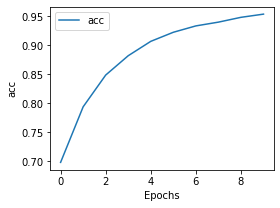

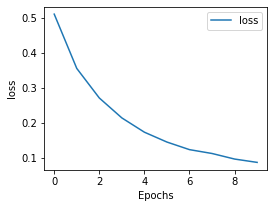

In [85]:
def plot_graph(history,string):
    plt.figure(figsize=(4,3)) 
    plt.plot(history.history[string],label=str(string))
    
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history_lstm,'acc')
plot_graph(history_lstm,'loss')

In [149]:
twt = ['package damaged']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model_lstm.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 478 681]]
1/1 - 0s
[1.5124229e-01 4.5597553e-06 2.8750300e-04 3.6045909e-04 5.5281399e-03]


In [143]:
model.save('Cip_Amazon.h5')
model_lstm.save('Amazon_Final.h5')

In [177]:
twt = ['Product is good']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=29, dtype='int32', value=0)
print(twt)
sentiment = model_lstm.predict(twt,batch_size=1,verbose = 2)[0]
print(sentiment)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 47  9 23]]
1/1 - 0s
[8.9704990e-06 1.7866492e-04 3.0648708e-04 1.3515654e-01 9.2089260e-01]


In [178]:
i = np.argmax(sentiment)
print(np.argmax(sentiment))
if i<=1:
    print("negative")
if i==2:
    print("Neural")
if(i>=3):
    print("Positive")

4
Positive


In [ ]:
i